In [66]:
#!pip install scikit-learn==0.15

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.stats import gaussian_kde

In [4]:
plt.style.use("classic")

In [5]:
%matplotlib inline

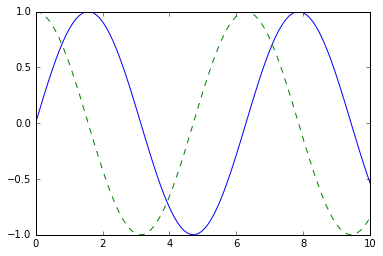

In [6]:
x = np.linspace(0,10,100)

fig = plt.figure()

plt.plot(x,np.sin(x),'-')
plt.plot(x,np.cos(x),'--')

plt.show()

In [7]:
fig.savefig("sin_cos.png")

In [8]:
from IPython.display import Image

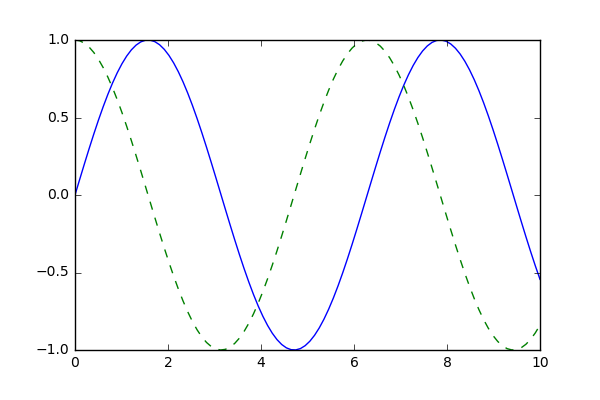

In [9]:
Image('sin_cos.png')

In [10]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

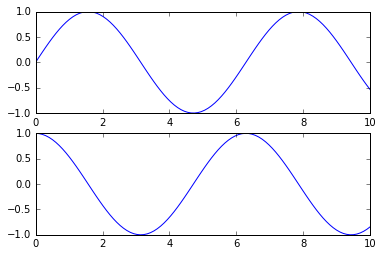

In [11]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x,np.sin(x))

plt.subplot(2,1,2)
plt.plot(x,np.cos(x))

plt.show()

<AxesSubplot:>

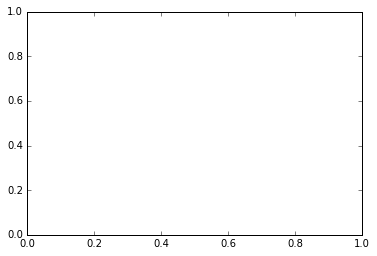

In [12]:
plt.gca()

In [13]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

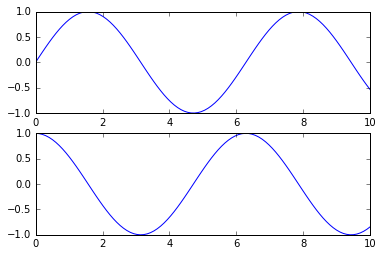

In [14]:
fig,ax = plt.subplots(2)

ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

plt.show()

In [15]:
plt.style.use("seaborn-whitegrid")

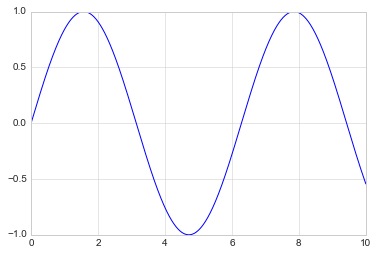

In [16]:
x = np.linspace(0,10,1000)

fig = plt.figure()
ax = plt.axes()
ax.plot(x,np.sin(x))

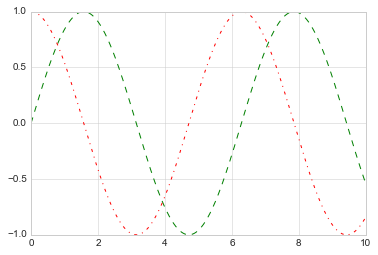

In [17]:
plt.plot(x,np.sin(x),color='green',linestyle='dashed')
plt.plot(x,np.cos(x),color='red',linestyle='dashdot')

plt.show()

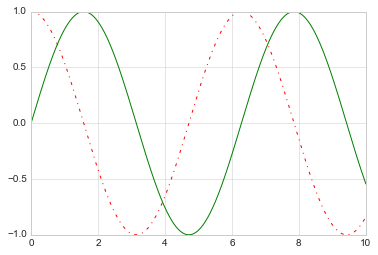

In [18]:
plt.plot(x,np.sin(x),'-g')
plt.plot(x,np.cos(x),'-.r')

plt.show()

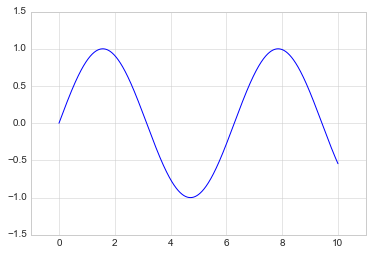

In [19]:
plt.plot(x,np.sin(x))
plt.xlim(-1,11)
plt.ylim(-1.5,1.5)
plt.show()

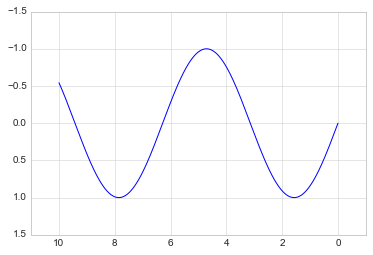

In [20]:
plt.plot(x,np.sin(x))
plt.xlim(11,-1)
plt.ylim(1.5,-1.5)
plt.show()

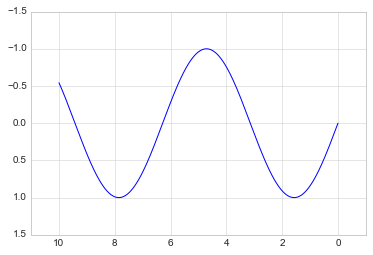

In [21]:
plt.plot(x,np.sin(x))
plt.axis([11,-1,1.5,-1.5])

plt.show()

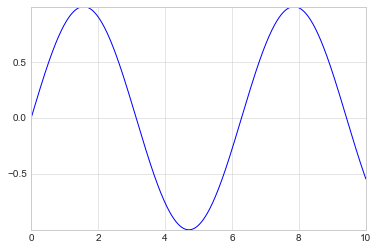

In [22]:
plt.plot(x,np.sin(x))
plt.axis("tight")

plt.show()

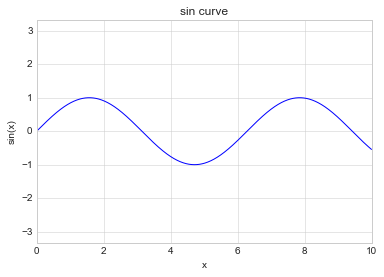

In [23]:
plt.plot(x,np.sin(x))
plt.axis("equal")
plt.title("sin curve")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

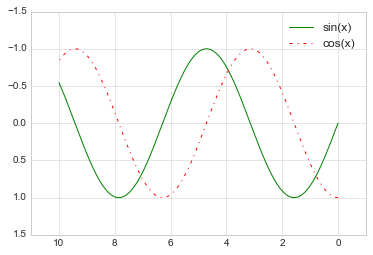

In [24]:
plt.plot(x,np.sin(x),'-g',label='sin(x)')
plt.plot(x,np.cos(x),'-.r',label='cos(x)')
plt.axis([11,-1,1.5,-1.5])
plt.legend()
plt.show()

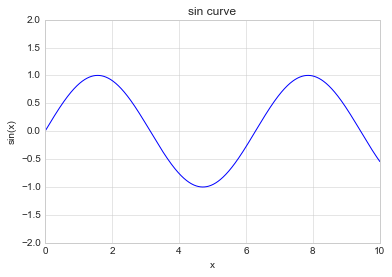

In [25]:
ax = plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10),ylim=(-2,2),xlabel="x",ylabel="sin(x)",title="sin curve")
plt.show()

In [26]:
#scatterplot

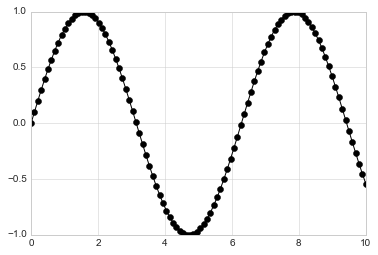

In [27]:
x = np.linspace(0,10,100)
y = np.sin(x)

plt.plot(x,y,marker='o',color='black')
plt.show()

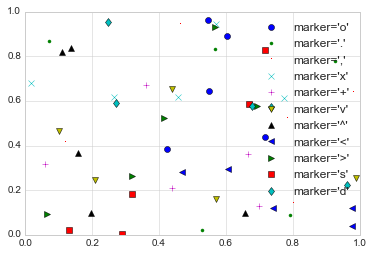

In [28]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5),rng.rand(5),marker,label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.show()

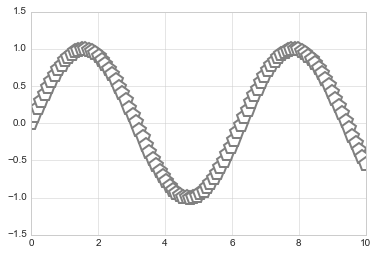

In [37]:
plt.plot(x, y, '-p', color='gray',
 markersize=15, linewidth=4,
 markerfacecolor='white',
 markeredgecolor='gray',
 markeredgewidth=2)

plt.ylim(-1.5,1.5)
plt.show()

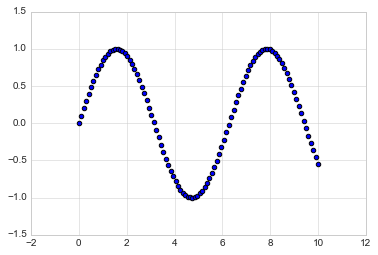

In [38]:
plt.scatter(x,y,marker='o')
plt.show()

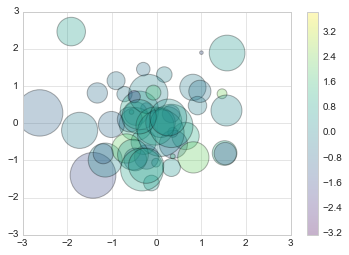

In [41]:
rng = np.random.RandomState(42)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.randn(100)
sizes = 1000*rng.randn(100)

plt.scatter(x,y,
           c=colors,
           s=sizes,
           alpha=0.3,
           cmap='viridis')
plt.colorbar()
plt.show()

In [43]:
#visualizing iris data

In [44]:
iris = load_iris()
features = iris.data.T

Text(0, 0.5, 'sepal width (cm)')

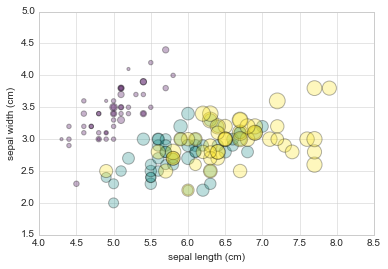

In [49]:
plt.scatter(features[0],
           features[1],
           alpha=0.3,
           s = 100*features[3],
           c=iris.target,
           cmap='viridis')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [50]:
#error bars

C:\Users\SKUP\AppData\Local\Temp/ipykernel_344/2995321239.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x,y,yerr=dy,fmt='.k',color='black',


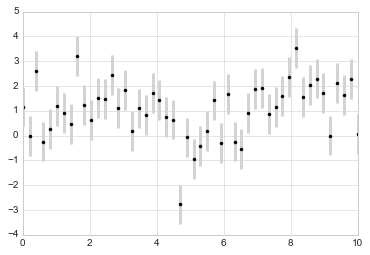

In [54]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x)+dy+np.random.randn(50)

plt.errorbar(x,y,yerr=dy,fmt='.k',color='black',
            ecolor='lightgray',elinewidth=3,capsize=0)
plt.show()

In [55]:
#gaussian process

In [60]:
model = lambda x: x*np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

In [69]:
gp = GaussianProcessRegressor(random_state=100)
gp.fit(xdata[:,np.newaxis],ydata)

GaussianProcessRegressor(random_state=100)

In [79]:
x_fit = np.linspace(0,10,1000)
y_fit = gp.predict(x_fit[:,np.newaxis])

error = x_fit-y_fit
mse = np.sqrt(sum(error)**2/len(error))

In [81]:
dyfit = 2*np.sqrt(mse)
dyfit

22.11915167653811

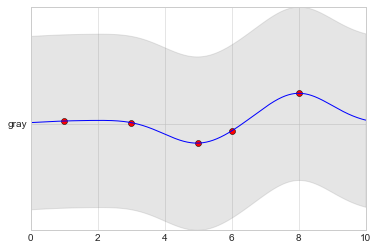

In [83]:
plt.plot(xdata,ydata,'or')
plt.plot(x_fit,y_fit,'-','gray')
plt.fill_between(x_fit,y_fit-dyfit,y_fit+dyfit,color='gray',alpha=0.2)

plt.show()

In [84]:
##contour plots

In [85]:
def f(x,y):
    return np.sin(x)**10+np.cos(10+x*y)+np.cos(x)

In [87]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

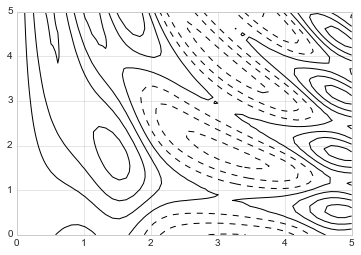

In [88]:
plt.contour(X,Y,Z,colors='black')
plt.show()

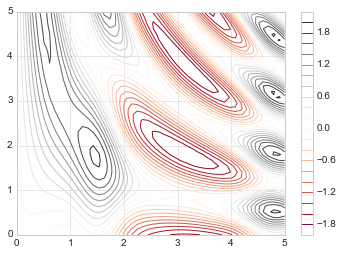

In [90]:
plt.contour(X,Y,Z,20,cmap='RdGy')
plt.colorbar()
plt.show()

In [95]:
#histograms

In [96]:
data = np.random.randn(1000)

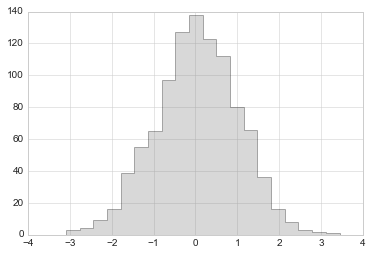

In [98]:
plt.hist(data,
        bins=20,
        color="gray",
        histtype="stepfilled",
        alpha=0.3)

plt.show()

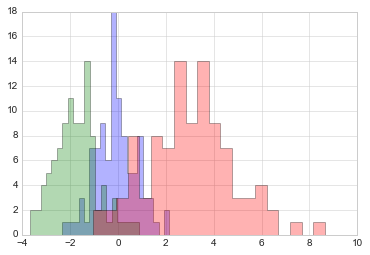

In [99]:
x1 = np.random.normal(0,0.8,100)
x2 = np.random.normal(-2,1,100)
x3 = np.random.normal(3,2,100)

kwargs = dict(histtype="stepfilled",
             bins=20,
             alpha=0.3)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)

plt.show()

In [100]:
count,bins = np.histogram(data,bins=5)
print(count)

[ 32 256 500 198  14]


In [101]:
mean = [0,0]
cov = [[1,1],[1,2]]

x,y = np.random.multivariate_normal(mean,cov,10000).T

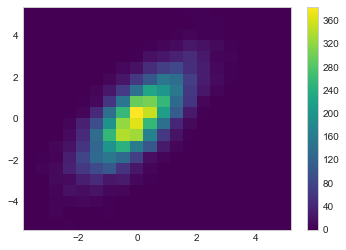

In [103]:
plt.hist2d(x,y,bins=20,cmap='viridis')
plt.colorbar()
plt.show()

In [107]:
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
print(counts)
print(xedges)
print(yedges)

[[  0.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   1.   1.   4.   2.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   4.   4.   6.  10.  10.   4.   7.   1.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  2.   0.   5.  17.  12.  35.  32.  19.  11.   6.   1.   1.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   1.   9.  13.  32.  62.  79.  60.  46.  36.   5.   2.   1.   1.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   5.  19.  46.  87. 131. 127. 134.  92.  45.   9.   5.   1.
    0.   0.   0.   0.   0.   0.]
 [  0.   2.   2.   9.  24. 106. 152. 199. 255. 197. 139.  59.  23.   7.
    1.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   7.  28.  57. 130. 246. 341. 322. 258. 150.  67.  22.
    8.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   1.   8.  23.  72. 160. 330. 366. 385. 295. 142.  62.
   17.   2.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   3.   6.  15. 105. 167. 256. 351

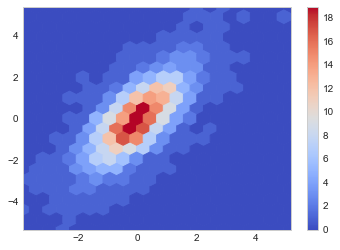

In [111]:
plt.hexbin(x,y,gridsize=20,bins=20,cmap='coolwarm')
plt.colorbar()
plt.show()

In [112]:
## gaussian kde

In [116]:
data = np.vstack([x,y])

kde = gaussian_kde(data)

xgrid = np.linspace(-3.5,3.5,40)
ygrid = np.linspace(-6,6,40)

Xgrid,Ygrid = np.meshgrid(xgrid,ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

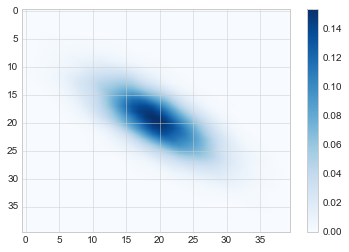

In [120]:
plt.imshow(Z.reshape(Xgrid.shape),aspect="auto",
          cmap="Blues")

plt.colorbar()
plt.show()

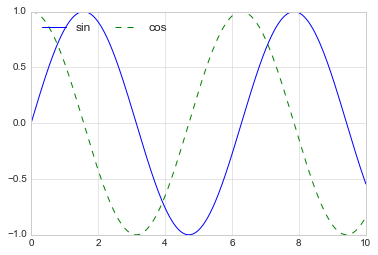

In [124]:
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.plot(x,np.sin(x),'-',label='sin')
ax.plot(x,np.cos(x),'--',label='cos')

ax.legend(loc='upper left',frameon=False,ncol=2)
plt.show()